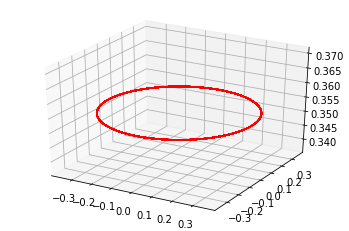

In [1]:
"""
Charge particle moving in an electromagnetic field
Written by:
Dasharath Adhikari
On:
Mon May 11 23:03:40 2020
"""

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


q = 1  # charge magnitude in Coulomb
theta = 45*(np.pi)/180  # velocity direction with respect to magentic field
m = 1  # mass of electron in kg)
v0 = 0.5  # velocity magnitude in m/s^2
E = np.array([0.0, 0.0, 0.0])
B = np.array([0.0, 0.0, 1.0])
v = np.array([v0*np.sin(theta), 0.0, v0*np.cos(theta)])
def lorentz_force(q, v, E, B):
    """
    Lorentz force equals q*(E + v*cross*B)
    q = magnitude of charge
    E = electric field vector
    v = velocity vector
    B = magnetic field vector
    Returns
    -------
    Lorentz force vector
    """
    return q * (E + np.cross(v, B))


# f = lorentz_force(q, v, E, B)
# print(f)


def lorentz_vector_func(y, t, q, m):
    """
    Two differential equations 
    describing the motion of a charge 
    particle in an electromagnetic field
    dr_dt = v
    dv_dt = lorentz_force/charge_mass
    Returns
    -------
    pair of first order equations
    """ 
    v = y[3:]
    dy_dt = v
    dv_dt = (q/m) * (E + np.cross(v, B))
    return np.hstack((dy_dt, dv_dt))

def trajectory_finder():
    r0 = np.array([1.0, 0.5, 0.0])
    y0 = np.hstack((r0, v))   # initial condition
    t_start = 0.0
    t_end = 100.0
    steps = 100000
    time = np.linspace(t_start, t_end, steps)
    y = odeint(func=lorentz_vector_func, y0=y0, t=time, args=(q, m))
    return y


y = trajectory_finder()
position_vector = y.T[:3]  # position of the charge particle
velocity_vector = y.T[3:]  # velocity of the charge particle

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot3D(*velocity_vector, color='red')
# ax.grid(False)
# ax.w_xaxis.set_pane_color((0.5, 0.45, 1.0, 1.0))
# ax.w_yaxis.set_pane_color((1.0, 0.5, 1.0, 1.0))
# ax.w_zaxis.set_pane_color((1.0, 1.0, 0.5, 1.0))
# ax.set_xlabel('X-axis')
# plt.axis('off')
plt.show()
